<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [55]:

sac_csv = r'C:/Users/asiminovsky/Desktop/GADataScience/Classes/10-LinReg/data/sacramento_real_estate_transactions.csv'


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

% matplotlib inline

UsageError: Line magic function `%` not found.


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [56]:
# A: shape, data types, missingness, state=CA, city=Sacramento
sac=pd.read_csv(sac_csv)
sac.shape

(985, 12)

In [19]:
sac.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [28]:
sac['sale_date']=pd.to_datetime(sac['sale_date'])

C:\Users\asiminovsky\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [27]:
sac.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [35]:
(sac['state']!='CA').sum()
# there is one incorrect state
sac[sac['state']!='CA']
# there's a typo!
sac.loc[sac.state=='AC']='CA'

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude


In [39]:
(sac['city']!='Sacramento').sum()
sac[sac['city']!='SACRAMENTO']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,2008-05-21 00:00:00,94905,38.621188,-121.270555
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,2008-05-21 00:00:00,98937,38.700909,-121.442979
16,6715 6TH ST,RIO LINDA,95673,CA,2,1,844,Residential,2008-05-21 00:00:00,113263,38.689591,-121.452239
17,6236 LONGFORD DR Unit 1,CITRUS HEIGHTS,95621,CA,2,1,795,Condo,2008-05-21 00:00:00,116250,38.679776,-121.314089
19,113 LEEWILL AVE,RIO LINDA,95673,CA,3,2,1356,Residential,2008-05-21 00:00:00,121630,38.689999,-121.46322
...,...,...,...,...,...,...,...,...,...,...,...,...
976,2400 INVERNESS DR,LINCOLN,95648,CA,3,2,1358,Residential,2008-05-15 00:00:00,229027,38.897814,-121.324691
979,1909 YARNELL WAY,ELK GROVE,95758,CA,3,2,1262,Residential,2008-05-15 00:00:00,230000,38.417382,-121.484325
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,2008-05-15 00:00:00,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,2008-05-15 00:00:00,235301,38.417,-121.397424


### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

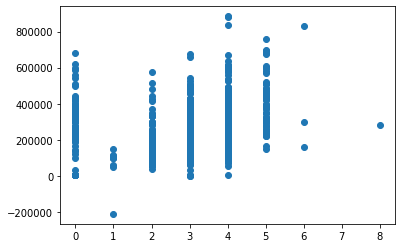

In [57]:
# A: beds, baths, sq_ft
x1=sac['beds']
x2=sac['baths']
x3=sac['sq__ft']
y=sac['price']

plt.scatter(x1,y)

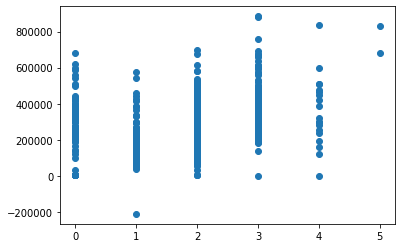

In [58]:
plt.scatter(x2,y)

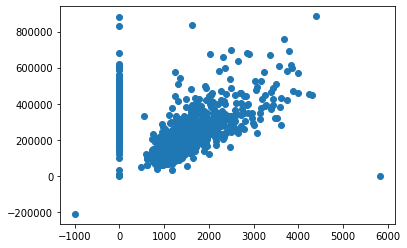

In [59]:
plt.scatter(x3,y)

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [5]:
# A: Square feet

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [68]:
# A:
from sklearn.linear_model import LinearRegression


def lin_reg_func(x,y):
    linreg.fit(x,y)
    beta_1=linreg.coef_
    beta_0=lingreg.intercept_
    print(beta_0)
    print(beta1)
    
lin_reg_func(sac['sq__ft'],sac['price'])

ValueError: Expected 2D array, got 1D array instead:
array=[ 836 1167  796  852  797 1122 1104 1177  941 1146  909 1289  871 1020
 1022 1134  844  795  588 1356 1118 1329 1240 1601  901 1088  963 1119
 1380 1248 1039 1152 1380 1116 1039 1418 1082 1472 1146  760 1304 1207
 1056 1043 1587 1120 1580 1955 1656 1477 1188 1590 1463 1714 1185 1406
 1943 1172 1152 1851 1215 1130 1603 1479 1420 1280 1586 1362 2162 1266
 1715 1820  936    0 1511 1590 1596 1341 2136 1616 1478 1287 1277 1448
 2235 2093 1193 2163 1269    0  958 2508 1305 1591 1326 1843 1921 2790
 1541 1018    0 1672 1380  975 2372 1446 1284 3009 3612 2056 1993 1857
 1126 2213 2494 1843 1520 2800 2309 2367 3516    0 1914 1690 2725 2354
    0 2185 1801 1961 3134 1915    0    0 2734 2110 3164 3599 2054 1830
 1627 3440 2846 2359 2052 3433 3615    0 2687 2724 3440 3508 2462    0
    0    0 2325    0  795 1099  840  800  746 1067 1316 1337  868  924
  610    0 1220  722 1643  722 1080 1039 1051  967 1098 1050 1110  888
 1120 1080  957  952 1211 1264 1080 1266  994 1202    0  722 1448 1188
 1183 1320 1117 1364 1310 1006 1104  810 1123  904 1156 1321 1392 1439
 1159 1671 1740 1265 1007 1716 1685 1829 1555 1120 1137 1174 1393    0
    0 1289 1799    0 1953  723    0  948 1578 1317    0 1360    0 1522
 1751 1465 1605 1475 1216 1315 1567 1776 2187 1291    0    0 1503 2491
 1269    0 1176 1456 1498 1574 2085 2170 1595 1567    0 1253 1768    0
 2030 1531    0 1653 2056 2494 1450 2169 1440 1527 1401 1411    0    0
 1284 2307 1329 1910 1981    0    0    0 2205 1449 1258 2575  539 2208
 1108 1595 2159 2295 1838 1900 1718 3389    0 3260 2016 2607 2724 3746
    0 3192    0    0    0 1247 2581 2068    0 3992 3397 3881    0 1598
 1929 3070    0    0    0    0 3984 2222 3838    0 2846 2484 1624  840
  484  970  623  932  796  834  834  924  795 1250  984 1013 1012  795
  918 1082  964 1404  625  888 1120 1331 1014 1448  966  779  836 1100
 1174 1207 1995  804  958 1366  901  696 1080 1104  972 1390 1354  795
  780 1587 1209 1139 1690 1245 1416 1300 1120 1590 1407 1516    0 1646
 1676 1370 1370 1351 1152 1452  990 1162 1182 1112 1100 1280 1280 1039
 1159 1917 1520 1204 1120 1436 1451 1638 1000 1152 1154 1353 1329 1356
 1505 1009 1144  930 1766 1940 1776 1258 1872 1112 1856 1939  998 1758
 2142  950 1739 1516  988 1555 1212 1871 1302  756 2026 1375 1250 1058
 1187 1324 1936 2382 1427 1678 1798 2652 1816 3076 1844 1306 2447 1176
 1182 1160 1424 1574 1830 1724 1255    0 2175 1904 1808 2711 1713 1457
 2724    0 1468 2550 1928 1922 1343 1510  960 1559 1624 2992 2109 1524
 1248 1876    0 1851    0 2218 1394 1410 3468 2346 2347 1659 2442    0
 2155    0 1810 2789 1606    0 2166    0 1871 1800 1683    0    0 1596
    0 1179    0 1639 3281 1697    0 2085    0 1744    0 1939    0 1788
 1691 2002 4303 4246 2274    0 3056 2503    0    0 1905 1320    0    0
 3037 3741 2660 3357 2896 2025 3788 3670    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 1166    0  838  904 1032  904 1080  990  900  861  906 1011 1089
  832  800 1292  810 1064  911  846 1320 1410 1115 1169 1164 1341 1219
 1127 1272 1253 1120 1118 1890 1260 1400 1264 1060 1132 1466 1092 1628
  960 1075 1428 1358 2475 1410 1711 1483 1140 1549 1410 1240 1712 1580
 1669 1029 1103 2161 1650 1320 1200 1170 1199 1695 1157 1410 1174 1593
 1093 1770 1436 1124 1139 1638 1328 1273 1082 1578  796 1386 1452 1513
    0 1578 1736    0 1473 1150 1127 1144  972 2306 1479 1040 1430 1800
 1953 1120 1232 -984    0 2329 1351    0 1376 1300 1566 1115 1032 1419
 1261 1637 1776 1338    0 2254 1441 1991 2126 1094 1462 2258 1074 2111
 1686 1915 2367 1962 1406 1789 1876 1235 2504    0 1676 1367 1899 1636
 1828    0 1438 1451 1520 1506 2605 1196 1621 1811 1540    0    0    0
    0    0 1543 2494 1650 2214 2280 1443 1582 1857 1735 2096 1720 2160
 1382    0 1721 1328    0 1982 1144 1623 1457 2555 1577 2592 1401    0
 1502 1327 1800 2169 2457    0 2004 2212 3134 1360    0 1276 2962 1888
    0    0 1548    0 2109 2484 2258 2212 1616 2372 2606    0 2877 2960
    0 2172 2100 1795    0 2295 2577    0 1727 1485 1655    0    0 2049
    0 2875    0 2199    0 1304 2334 2278 1493    0    0    0 2787 2824
 3261 2053 2379    0    0    0    0    0    0 3173    0 1348    0 1252
 3229 3863    0    0 2356    0 3579    0    0    0 4400    0 5822 1512
  611  876  933  864 1011 1158 1092  956 1139 1058 1040 1354 1051  682
 1161 1004 1229 1249 1161 1010    0 1462 1269 1188 1570 1093  962 1089
 1127 1309  970 1144 1000    0 1206 1285 1543  884 1019 1392  924 1217
 1670 1302 1488 1373 1381 1265  881    0 1608 1344 1202 1104    0 1859
 1232 1638 1177 1582  904 1340 1204 1477 1497  960    0 1428 1039 1529
 1892 1887 1294 1638 1677 1073 1231 1175 1416    0 1358 1609 1968 1089
 1296 1189  795 1371 1310 1262 1740 1517 1450 1416  888 1882 1302 1418
    0 1319 1770 1627    0 1040  960    0 1456 1450 1358 1329 1715 1262
 2280 1477 1216 1685 1362].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### 6. Interpret the intercept. Interpret the slope.

In [7]:
# A:

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [8]:
# A:

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [9]:
# A: